In [3]:
# Import necessary libraries
import numpy as np
import scipy as sc

In [4]:
# Define the coefficient matrix A
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
print(A)

[[1 3 5]
 [2 5 1]
 [2 3 8]]


In [5]:
# Define the right-hand side vector b
b = np.array([[10], [8], [3]])
print(b)

[[10]
 [ 8]
 [ 3]]


In [6]:
# Calculate the inverse of A and multiply by b to find the solution vector
# linalg=linear algebra
C = sc.linalg.inv(A).dot(b)
print(C)

[[-9.28]
 [ 5.16]
 [ 0.76]]


In [7]:
# Alternatively, use the solve function to find the solution vector directly
D = sc.linalg.solve(A, b)
print(D)

[[-9.28]
 [ 5.16]
 [ 0.76]]


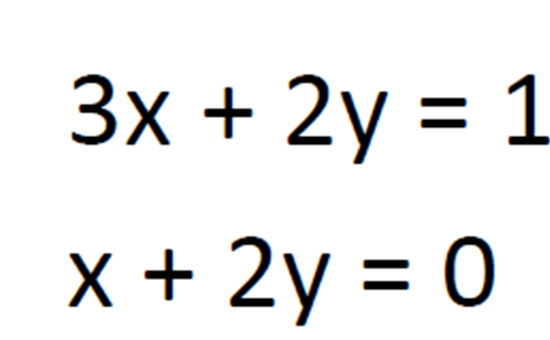

In [9]:
import numpy as np
from scipy.linalg import solve

#Coefficients matrix 
A = np.array ([[3,2],[1,2]])

# Constants vector
b = np.array([1,0])

#Using the solve function to find the solution of the system of equations
solution = solve (A,b)
solution

array([ 0.5 , -0.25])

# Solving Ordinary Differential Equations (ODE) with Runge-Kutta Method

In [26]:
import matplotlib.pyplot as plt

# Python program to implement Runge Kutta method
#A sample differential equation "dy/dx=(x-y)/2"
def dydx(x,y):
    return ((x-y)/2)

# Finds value of y for a given x using step size h
# initial value y0 at x0.
def RungeKutta(x0,y0,x,h):
    #Count number of iterations using step size or step height
    n = int ((x-x0)/h)
    
    #Iterate for number of iterations
    y=y0
    for i in range(1,n+1):
        # Apply Runge Kutta Method to find next value of y
        k1 = dydx(x0, y)
        k2 = dydx(x0 + 0.5 * h, y + 0.5 *h* k1)
        k3 = dydx(x0 + 0.5 * h, y + 0.5 *h* k2)
        k4 = dydx(x0 + h, y + h * k3)
        
        # Update next value of y
        y = y +(1.0/6.0)* h *(k1 + 2 * k2 + 2 * k3 + k4)
        
        # Update next value of x
        x0 = x0 + h
    return y

# Driver method
x0 = 0
y = 1
x = 5
h = 0.2
print('The value of y at x is:', RungeKutta(x0, y, x, h))

The value of y at x is: 3.2462555535430524


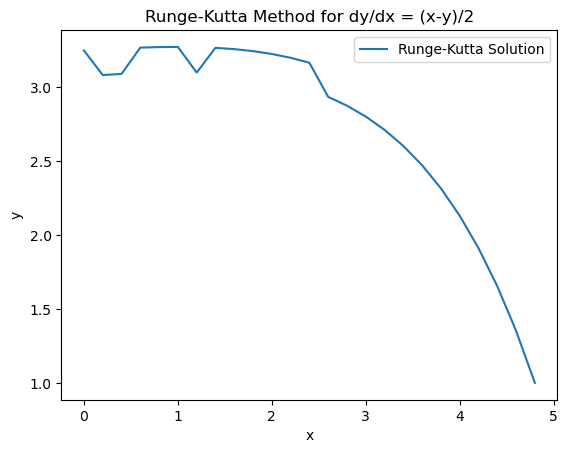

In [27]:
import matplotlib.pyplot as plt

# Your existing code for dydx and RungeKutta functions...

# Driver method
x0 = 0
y0 = 1
x = 5
h = 0.2

# Lists to store the x and y values for plotting
x_values = []
y_values = []

# Iterate using Runge-Kutta and store the values for plotting
while x0 <= x:
    x_values.append(x0)
    y_values.append(RungeKutta(x0, y0, x, h))
    x0 = x0 + h

# Plotting the graph
plt.plot(x_values, y_values, label='Runge-Kutta Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Runge-Kutta Method for dy/dx = (x-y)/2')
plt.legend()
plt.show()

# Pressure Profile In A Vessel

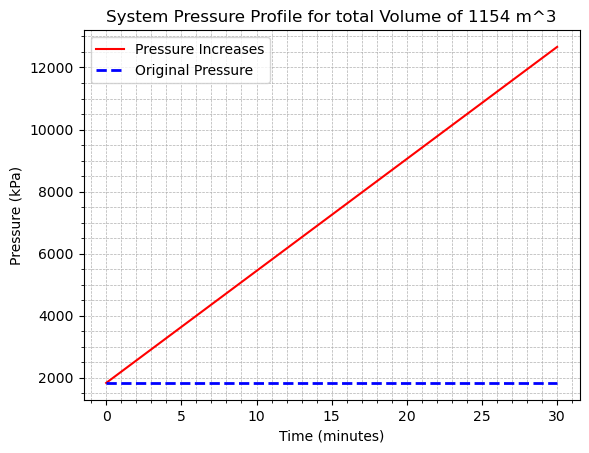

In [28]:
# Importing necessary libraries 
import numpy as np
import scipy as sc
import matplotlib.pyplot as plot

# parameter values for original SEIR
V = 1154 # m3
R = 8.314 # R[J/(mol*K)]
T = 120 # °C

mass_in = 473220 #kg/hr
MW_in = 56.6 #kg/kmol
mass_out = 28742 #kg/hr
MW_out = 40.4 #kg/kmol

# calculation , time in minutes
Tk = T + 273.15 #Convert to Kelvin
mol_in = mass_in / MW_in/60 #kmol/min #molar flow rate per minute
mol_out = mass_out / MW_out/60 #kmol/min 

# inital condition
P0 = 1830 #kPa

#differential equation using ideal gas
def dPdt(P,t):
    # the differential equations 
    dPdt = (mol_in - mol_out)/(V/(R*Tk))
    return dPdt

#Create the x axis for the integration
#time to response is 30 minutes
start = 0
end = 30
t = np.linspace (start, end, end) 
# linspace_creating arrays by specifying the start, stop, and num parameters
# Create Evenly or Non-Evenly Spaced Arrays

Pinitial = np.linspace(P0, P0, end)

# integration of the differential equation
P = sc.integrate.odeint(dPdt, P0, t)

# Plotting the results
plt.figure()
plt.plot(t, P, 'r', label='Pressure Increases')
plt.plot(t, Pinitial, 'b--', label='Original Pressure', linewidth=2)
plt.title(f'System Pressure Profile for total Volume of {V} m^3')
plt.xlabel('Time (minutes)')
plt.ylabel('Pressure (kPa)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend()
plt.show()

# Modeling a Zombie Apocalypse

In [32]:
# Importing the necessary libraries for numerial computations and plotting

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

#Parameters for the model, representing various rates per day
P = 0  # Birth rate (new individuals per day)
d = 0.0001  # Natural death percent (probability of dying each day)
B = 0.0095  # Transmission percent (probability of a living becoming a zombie each day)
G = 0.0001  # Resurrect percent (probability of a dead becoming a zombie each day)
A = 0.0001  # Destroy percent (probability of a zombie being destroyed each day)


# The system of differential equations: y is the vector of populations, t is time
def f(y, t):
    Si = y[0]  # Susceptible (living) population
    Zi = y[1]  # Zombie population
    Ri = y[2]  # Removed (dead) population
    # Model equations for the rates of change of each population
    f0 = P - B * Si * Zi - d * Si  # Rate of change of living
    f1 = B * Si * Zi + G * Ri - A * Si * Zi  # Rate of change of zombies
    f2 = d * Si + A * Si * Zi - G * Ri  # Rate of change of dead
    return [f0, f1, f2]


# Initial conditions for the model
S0 = 500.0  # Initial population of living
Z0 = 0      # Initial zombie population
R0 = 0      # Initial dead population
y0 = [S0, Z0, R0]  # Vector of initial conditions
t = np.linspace(0, 5., 1000)  # Time grid for the simulation (0 to 5 days, 1000 points)


# Solving the differential equations over time t, starting from initial conditions y0
soln = odeint(f, y0, t)
S = soln[:, 0]  # Extracting the solution for living
Z = soln[:, 1]  # Extracting the solution for zombies
R = soln[:, 2]  # Extracting the solution for dead


# Plotting the results for the initial scenario
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Initial Dead Population; No New Births.')
plt.legend(loc=0)
plt.show()


# Changing the initial conditions for a scenario with 1% initial dead population
R0 = 0.01 * S0  # 1% of the initial population is dead
y0 = [S0, Z0, R0]  # Updating the initial conditions
soln = odeint(f, y0, t)  # Solving the DEs again with new initial conditions
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]


# Plotting the results for the second scenario
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Initial Dead Population; No New Births.')
plt.legend(loc=0)
plt.show()


# Updating the parameters for the third scenario with daily births
P = 10  # 10 new births daily
y0 = [S0, Z0, R0]  # Initial conditions remain the same as the second scenario
soln = odeint(f, y0, t)  # Solving the DEs with the new birth rate
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]


# Plotting the results for the third scenario
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Initial Dead Population; 10 Daily Births')
plt.legend(loc=0)
plt.show()


NameError: name 'odeint' is not defined